# Settings

In [27]:
# Main switch
point_by_point = False
algorithm = 'score' # one of 'carl', 'combined', 'score' (the latter two only for point_by_point == False)
filename_settings = ''

# Preparations

In [28]:
import math
import copy
import itertools
import numpy as np
import scipy.stats
import scipy.interpolate
from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (5, 5)
from matplotlib.mlab import griddata

from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, Matern

# Load results from cluster runs

In [29]:
if point_by_point:
    data_dir = '../results/point_by_point'
else:
    data_dir = '../results/parameterized'
figure_dir = '../figures/calibration'
    
cal0_histo = np.load(data_dir + '/cal0histo_nottrained_' + algorithm + filename_settings + '.npy')
cal1_histo = np.load(data_dir + '/cal1histo_nottrained_' + algorithm + filename_settings + '.npy')
cal0_edges = np.load(data_dir + '/cal0edges_nottrained_' + algorithm + filename_settings + '.npy')
cal1_edges = np.load(data_dir + '/cal1edges_nottrained_' + algorithm + filename_settings + '.npy')

r_raw = np.load(data_dir + '/r_nottrained_' + algorithm + filename_settings + '.npy')
r_calibrated = np.load(data_dir + '/r_nottrained_' + algorithm + '_calibrated' + filename_settings + '.npy')

# Plot calibration histogram

/Users/johannbrehmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


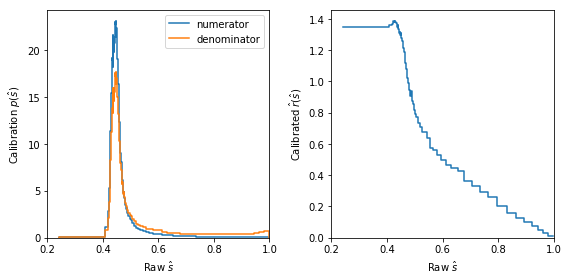

In [30]:
cal0_hist_ = np.hstack([cal0_histo, [0.]])
cal1_hist_ = np.hstack([cal1_histo, [0.]])

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.step(cal0_edges, cal0_hist_,
         where='post',
         alpha=1., fillstyle='none',
         color='C0', label='numerator')
plt.step(cal1_edges, cal1_hist_,
         where='post',
         alpha=1., fillstyle='none',
         color='C1', label='denominator')
plt.xlabel(r'Raw $\hat{s}$')
plt.ylabel(r'Calibration $p(\hat{s})$')
plt.xlim(0.2,1.)
plt.ylim(0.,None)
plt.legend()

plt.subplot(1,2,2)
plt.step(cal0_edges, cal0_hist_ / cal1_hist_,
         where='post', fillstyle='none',
         color='C0', label='numerator')
plt.xlabel(r'Raw $\hat{s}$')
plt.ylabel(r'Calibrated $\hat{r}(\hat{s})$')
plt.xlim(0.2,1.)
plt.ylim(0.,None)

plt.tight_layout()
plt.savefig(figure_dir + '/calibration_histogram' + algorithm + ".pdf")